### Building Simple Linear Regression Model

In [4]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [6]:
df=pd.read_csv( 'MBA Salary.csv' ) 
df.head(4) 

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


####  Creating Feature Set(X) and Outcome Variable(Y)

In [9]:
import statsmodels.api as sm
X=sm.add_constant(df['Percentage in Grade 10'] ) 
X.head(5)


,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [11]:
y=df["Salary"]
y

0     270000
1     200000
2     240000
3     250000
4     180000
5     300000
6     260000
7     235000
8     425000
9     240000
10    250000
11    180000
12    428000
13    450000
14    300000
15    240000
16    252000
17    280000
18    231000
19    224000
20    120000
21    260000
22    300000
23    120000
24    120000
25    250000
26    180000
27    218000
28    360000
29    150000
30    250000
31    200000
32    300000
33    330000
34    265000
35    340000
36    177600
37    236000
38    265000
39    200000
40    393000
41    360000
42    300000
43    250000
44    360000
45    180000
46    180000
47    270000
48    240000
49    300000
Name: Salary, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

##### Splitting the dataset into training and validation sets

In [15]:
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size = 0.8,random_state = 100 ) 


#### fitting the Model

In [27]:
mbasalary=sm.OLS(train_y,train_X).fit()

##### printing Estimated Parameters and interpreting them

In [18]:
print( mbasalary.params ) 

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


####  Model Diagnostics

In [20]:
mbasalary.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2022-08-05 15:08      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

#### residual Anlalysis
####  Checking Normality

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

<Figure size 288x432 with 0 Axes>

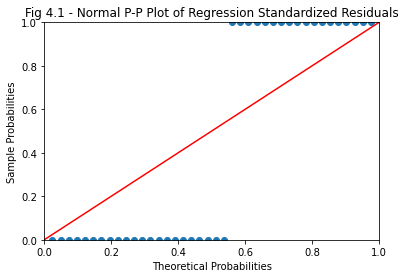

In [28]:
salary_resid = mbasalary.resid 
probplot=sm.ProbPlot(salary_resid) 
plt.figure(figsize=(4,6)) 
probplot.ppplot(line='45') 
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" ) 
plt.show() 

####  Test of Homoscedasticity


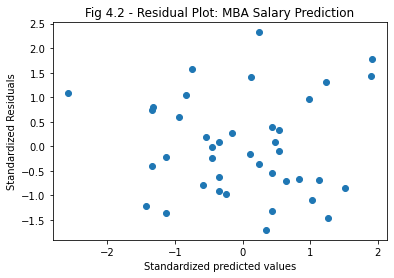

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values(mbasalary.fittedvalues), 
get_standardized_values(salary_resid)) 
plt.title("Fig 4.2 - Residual Plot: MBA Salary Prediction"); 
plt.xlabel("Standardized predicted values") 
plt.ylabel("Standardized Residuals"); 



####  Outlier Analysis
#### 1 Z-Score

In [32]:
from scipy.stats import zscore 
df['z_score_salary']=zscore(df.Salary) 
df[(df.z_score_salary>3.0)|(df.z_score_salary<-3.0)] 

,S. No.,Percentage in Grade 10,Salary,z_score_salary


#### Cook's Distance

In [ ]:
import numpy as np
mba_influence=mbasalary.get_influence() 
(c,p)=mba_influence.cooks_distance 
plt.stem(np.arange( len( train_X) ), 
np.round( c, 3 ), 
markerfmt="," ); 
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray data
set" ); 
plt.xlabel( "Row index") 
plt.ylabel( "Cooks Distance");